In [92]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')  # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'  # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2개의 축을 갖는 그래프 작성
- 남북한 발전량 데이터셋을 사용
- 막대그래프는 북한의 발전량을 표시
- 선그래프는 북한 발전량의 전년 대비 증감률을 백분율로 나타낸다.

In [76]:
df = pd.read_excel('data/남북한발전전력량.xlsx')
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [77]:
# 북한 전력량만 선택
df = df.loc[5:9]

In [78]:
# 전력량 (억㎾h) 컬럼 삭제
df.drop(['전력량 (억㎾h)'], axis=1, inplace=True)
df

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [79]:
# index를 '발전 전력별' 로 변경
df.set_index('발전 전력별', inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [80]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [81]:
# 합계 컬럼을 총발전량으로 변경
df.rename(columns={'합계': '총발전량'}, inplace=True)
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [82]:
# 증감율(변동율) 계산1
df['증감율1'] = df['총발전량'].pct_change() * 100

In [83]:
# 전년도 총발전량 컬럼 추가
df['전년도 총발전량'] = df['총발전량'].shift(1)

In [84]:
# 증감율(변동율) 계산
df['증감율2'] = (df['총발전량'] / df['전년도 총발전량'] - 1) * 100
df

발전 전력별,총발전량,수력,화력,원자력,증감율1,전년도 총발전량,증감율2
1990,277,156,121,-,NaN,NaN,NaN
1991,263,150,113,-,-5.054152,277,-5.054152
1992,247,142,105,-,-6.083650,263,-6.08365
1993,221,133,88,-,-10.526316,247,-10.526316
1994,231,138,93,-,4.524887,221,4.524887
1995,230,142,88,-,-0.432900,231,-0.4329
1996,213,125,88,-,-7.391304,230,-7.391304
1997,193,107,86,-,-9.389671,213,-9.389671
1998,170,102,68,-,-11.917098,193,-11.917098
1999,186,103,83,-,9.411765,170,9.411765


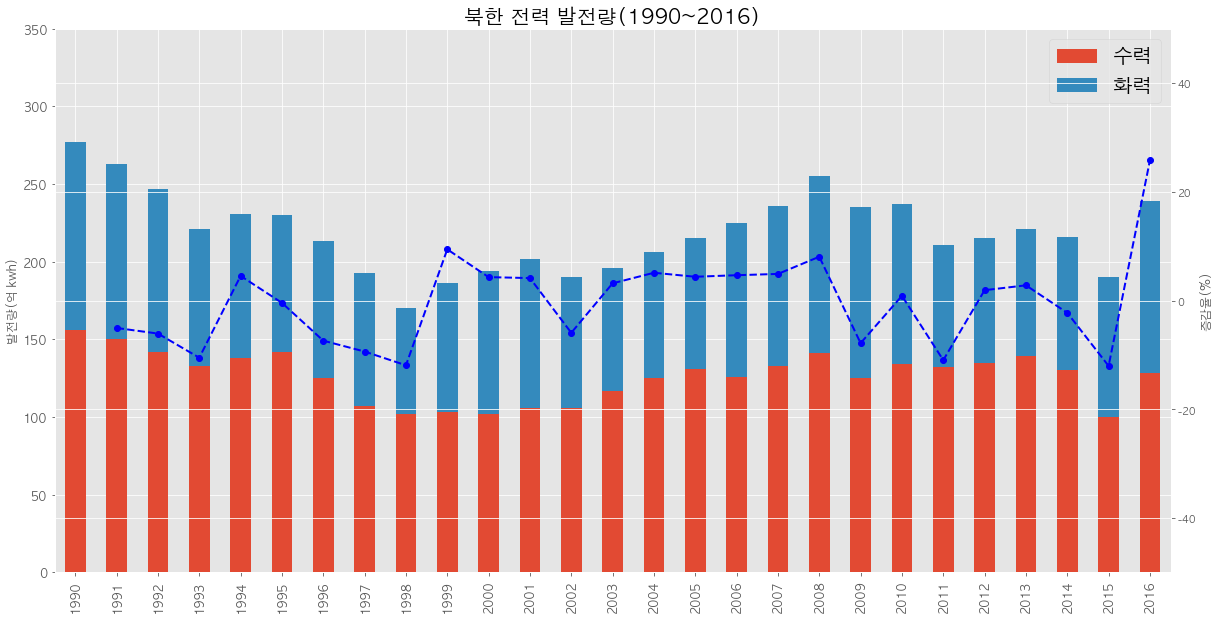

In [127]:
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# 2축 그래프 그리기,  color like ukrainian flag
ax1 = df[['수력', '화력']].plot(figsize=(20, 10), fontsize=12, linewidth=2, kind='bar', stacked=True, ylim=(0, 350), ylabel='발전량(억 kwh)')
plt.title('북한 전력 발전량(1990~2016)', fontsize=20)

ax2 = ax1.twinx()
ax2.plot(df['증감율1'], color='blue', linewidth=2, linestyle='--', label='증감율', marker='o')
ax2.set_ylim(-50, 50)
ax2.set_ylabel('증감율(%)')

# lengen size
ax1.legend(loc='best', fontsize=20)

plt.show()